

```
# This is formatted as code
```

# DHV LAB Sheet 7  flights Data set


In [ ]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

In [ ]:
# Read a dataset with missing values
flights = pd.read_csv("flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


### Missing Values

In [ ]:
# Select the rows that have at least one missing value
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


In [ ]:
# Filter all the rows where arr_delay value is missing:
flights1 = flights[ flights['arr_delay'].notnull( )]
flights1.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [ ]:
# Remove all the observations with missing values
flights2 = flights.dropna()

In [ ]:
flights2


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160749,2013,9,30,2105.0,-1.0,2329.0,-25.0,UA,N477UA,475,EWR,IAH,175.0,1400,21.0,5.0
160750,2013,9,30,2121.0,21.0,2349.0,-25.0,DL,N193DN,2363,JFK,LAX,296.0,2475,21.0,21.0
160751,2013,9,30,2140.0,0.0,10.0,-30.0,AA,N335AA,185,JFK,LAX,298.0,2475,21.0,40.0
160752,2013,9,30,2149.0,-7.0,2245.0,-23.0,UA,N813UA,523,EWR,BOS,37.0,200,21.0,49.0


In [ ]:
# Fill missing values with zeros
nomiss =flights['dep_delay'].fillna(0)
nomiss.isnull().any()

False

---
### Common Aggregation Functions:

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



In [ ]:
# Find the number of non-missing values in each column
flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,160754.0,160754.000000,160754.000000,158418.000000,158418.000000,158275.000000,157927.000000,160754.000000,157927.000000,160754.000000,158418.000000,158418.000000
mean,2013.0,6.547395,15.716567,1316.146006,9.463773,1517.471161,2.094537,1156.344987,180.685158,1282.445420,12.837582,32.387847
std,0.0,3.410001,8.762794,470.823715,36.545109,510.695413,41.479349,695.884283,97.507866,765.895383,4.725552,18.687423
min,2013.0,1.000000,1.000000,1.000000,-33.000000,1.000000,-75.000000,1.000000,21.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,855.000000,-5.000000,1112.000000,-19.000000,504.000000,111.000000,733.000000,8.000000,16.000000
50%,2013.0,7.000000,16.000000,1345.000000,-2.000000,1541.000000,-7.000000,1157.000000,153.000000,1076.000000,13.000000,32.000000
75%,2013.0,10.000000,23.000000,1725.000000,7.000000,1944.000000,9.000000,1715.000000,258.000000,1728.000000,17.000000,51.000000
max,2013.0,12.000000,31.000000,2400.000000,1014.000000,2400.000000,1007.000000,2599.000000,695.000000,4963.000000,24.000000,59.000000


In [ ]:
# Find mean value for all the columns in the dataset
flights.min()

<ipython-input-11-de0c310470ee>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  flights.min()


year         2013
month           1
day             1
dep_time      1.0
dep_delay   -33.0
arr_time      1.0
arr_delay   -75.0
carrier        AA
flight          1
origin        EWR
dest          ANC
air_time     21.0
distance       17
hour          0.0
minute        0.0
dtype: object

In [ ]:
# Let's compute summary statistic per a group':
flights.groupby('carrier')['dep_delay'].mean()

carrier
AA     8.586016
AS     5.804775
DL     9.264505
UA    12.106073
US     3.782418
Name: dep_delay, dtype: float64

In [ ]:
# We can use agg() methods for aggregation:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.463773,2.094537
max,1014.000000,1007.000000


In [ ]:
# An example of computing different statistics for different columns
flights.agg({'dep_delay':['min','mean',max], 'carrier':['nunique']})

,dep_delay,carrier
min,-33.000000,NaN
mean,9.463773,NaN
max,1014.000000,NaN
nunique,NaN,5.0


### Basic descriptive statistics

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %


In [ ]:
# Convinient describe() function computes a veriety of statistics
flights.dep_delay.describe()

count    158418.000000
mean          9.463773
std          36.545109
min         -33.000000
25%          -5.000000
50%          -2.000000
75%           7.000000
max        1014.000000
Name: dep_delay, dtype: float64

In [ ]:
# find the index of the maximum or minimum value
# if there are multiple values matching idxmin() and idxmax() will return the first match
flights['dep_delay'].idxmin()  #minimum value

54111

In [ ]:
# Count the number of records for each different value in a vector
flights['carrier'].value_counts()

UA    58665
DL    48110
AA    32729
US    20536
AS      714
Name: carrier, dtype: int64

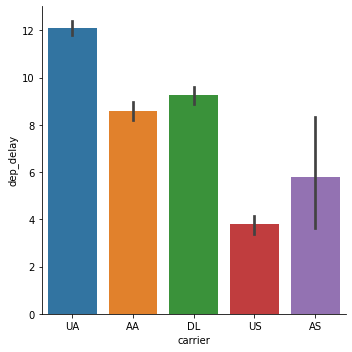

In [ ]:
#factorplot
sns.catplot(x='carrier',y='dep_delay', data=flights, kind='bar')

---
*Exercise*

In [ ]:
#Using seaborn package explore the dependency of arr_delay on dep_delay (scatterplot or regplot) using flights dataset


(array([58665.,     0.,     0.,     0.,     0., 32729.,     0.,     0.,
            0.,     0., 48110.,     0.,     0.,     0.,     0., 20536.,
            0.,     0.,     0.,   714.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 20 Patch objects>)

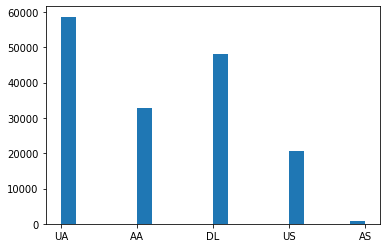

In [ ]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(flights['carrier'],bins=20, density=False)

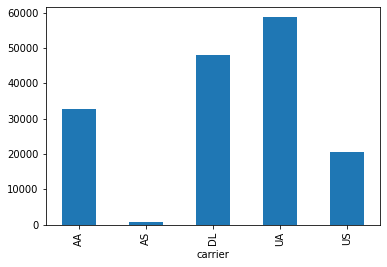

In [ ]:
# Use regular matplotlib function to display a barplot
flights.groupby(['carrier'])['month'].count().plot(kind='bar')

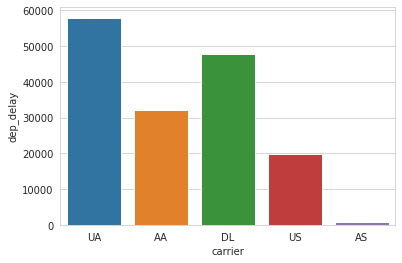

In [ ]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")

ax = sns.barplot(x='carrier',y ='dep_delay', data=flights, estimator=len)

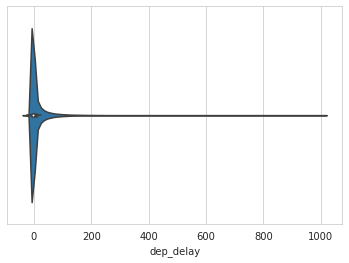

In [ ]:
#Violinplot
sns.violinplot(x = "dep_delay", data=flights)

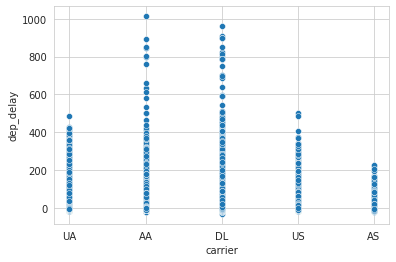

In [ ]:
sns.scatterplot(x='carrier', y='dep_delay', data=flights)

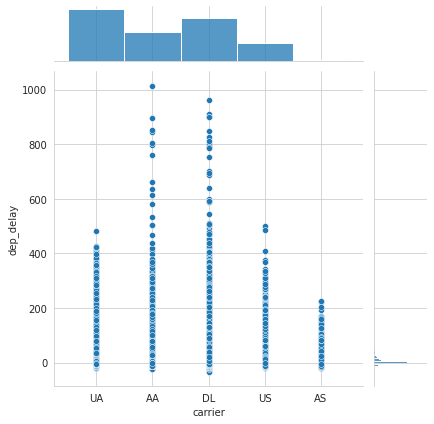

In [ ]:
#Scatterplot in seaborn
sns.jointplot(x='carrier', y='dep_delay', data=flights)

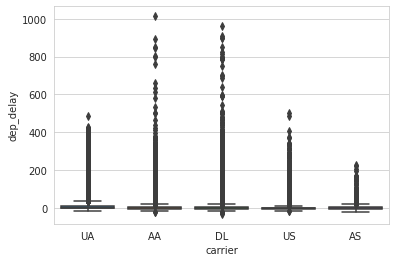

In [ ]:
# box plot
sns.boxplot(x='carrier',y='dep_delay', data=flights)

In [ ]:
# swarm plot
sns.swarmplot(x='carrier',y='dep_delay', data=flights)

In [ ]:
# Pairplot 
sns.pairplot(flights)